In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# !pip install --user modin[dask]

In [3]:
import sys
sys.path.append("..")

In [4]:
from optimus import Optimus

C:\Users\argenisleon\Anaconda3\lib\site-packages\dask\config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\argenisleon\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [76]:
op = Optimus("pandas", master="local[*]", app_name="optimus", comm=True)

In [77]:
# df = op.load.csv("data/metadata.csv", sep=",", header=True, null_value="null", infer_schema='true',charset="latin_1").ext.cache()
# df = op.load.csv("data/Meteorite_Landings.csv", sep=",", header=True, null_value="null", infer_schema='true',charset="latin_1").ext.cache()

In [78]:
# df.ext.display()

In [79]:
# !pip install genson

In [80]:
# ujson.load("data/corona.json")

In [81]:
# from genson import SchemaBuilder
# builder = SchemaBuilder()
# builder.add_object(jdata)
# a =builder.to_schema()

In [100]:
from optimus.engines.pandas.io.json import JSON
json = JSON()
json.load('data/noncomm_use_subset/*.json')
json.data["body_text"]
# json.schema()
# json.freq(n=20)

[{'text': 'human type 1 DM. The aim of this study was to evaluate changes in fecal microbiota and fecal unconjugated BAs profile in dogs with naturally-occurring DM during insulin therapy and compare them to healthy control dogs (HC).',
  'cite_spans': [],
  'ref_spans': [],
  'section': ''},
 {'text': 'To this aim, naturally-passed fecal samples and left over serum samples obtained for diagnostic proposals from 17 adult dogs with DM were collected. Fecal samples from 16 clinically healthy dogs were used as a control population. In addition, serum folate, cobalamin and cTLI were assessed in the DM group to exclude the presence of other causes of dysbiosis; for each DM dog, the fed diet was known and the use of antibiotic within the previous 12 months was excluded.',
  'cite_spans': [],
  'ref_spans': [],
  'section': ''},
 {'text': 'DNA was extracted from each fecal sample prior to quantitative PCR (qPCR) analysis. Data for 8 bacterial groups was compiled to calculate a microbiota dysb

https://machinelearningmastery.com/time-series-data-visualization-with-python/

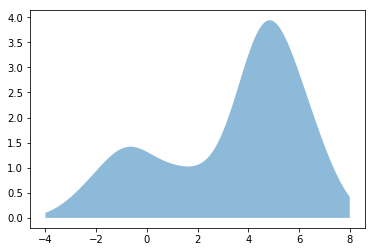

In [128]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(20)
x_d = np.linspace(-4, 8, 1000)
density = sum(norm(xi).pdf(x_d) for xi in x)

plt.fill_between(x_d, density, alpha=0.5)
# plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)

# plt.axis([-4, 8, -0.2, 5]);

In [112]:
# json.flatten("ref_entries")
df = json.to_pandas("body_text")

In [113]:
df.cols.word_count("text","text_1")

,text,section,cite_spans__start,cite_spans__end,cite_spans__text,cite_spans__ref_id,ref_spans__start,ref_spans__end,ref_spans__text,ref_spans__ref_id,text_1
0,human type 1 DM. The aim of this study was to ...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37
1,"To this aim, naturally-passed fecal samples an...",,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79
2,DNA was extracted from each fecal sample prior...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70
3,Median DI was statistically different between ...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86
4,The results of this preliminary study did not ...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176
...,...,...,...,...,...,...,...,...,...,...,...
778,The study was carried out on six dogs with a p...,SCH-P-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109
779,Parenchymal liver metastasis was found in one ...,SCH-P-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189
780,The obtained results indicate that contrast-en...,SCH-P-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
781,The enhancement patterns used in human medicin...,SCH-P-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20


In [86]:
op = Optimus("dask", comm=True)
df = op.load.csv("data/Meteorite_Landings.csv", sep=",", error_bad_lines=False, header=True, null_value="null", infer_schema='true', charset="UTF-8").ext.cache()

C:\Users\argenisleon\Anaconda3\lib\site-packages\distributed\bokeh\core.py:74: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


In [7]:
_output = df.ext.send(output="json", infer=False, advanced_stats=False)

In [24]:
_output = df.ext.send(output="json", infer=False, advanced_stats=False)
_output = df.ext.set_buffer("*")
_output = df.ext.buffer_window("*", 0, 16).ext.to_json("*")
_output = df.ext.buffer_window("*", 16, 31).ext.to_json("*")
_output = df.ext.buffer_window("*", 0, 16).cols.unnest("year", separator=", ", splits=2, output_cols="year")

_output = df.ext.buffer_window("*", 15, 31).cols.unnest("year", separator=", ", splits=2, output_cols="year").cols.find("year", sub=[", "]).ext.to_json("*")
_output = df.ext.buffer_window("*", 0, 16).cols.unnest("year", separator="/", splits=2, output_cols="year").cols.find("year", sub=["/"]).ext.to_json("*")
_output = df.ext.buffer_window("*", 15, 31).cols.unnest("year", separator="/", splits=2, output_cols="year").cols.find("year", sub=["/"]).ext.to_json("*")
